## 1- Objetivo
 
 - Encontrar o melhor modelo para a previsão de faturamento.
 
  - Neste notebok , ao invés de utilizar label encoder para converter a variável categórica, será utilizado getdummies.

 - Importando os dados pre-processados

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
url = 'https://raw.githubusercontent.com/robertferro/studio-estetica/main/1%20-%20EDA/dados_modelagem.csv'

In [3]:
dados = pd.read_csv(url)

In [4]:
dados.head()

,data_atendimento,design_de_sobrancelhas,design_coloracao,design_coloracao_buco,buco,brown_lamination,micropigmentacao,extensao_de_cilios,lash_lifting,limpeza_de_pele,microagulhamento,peeling_quimico,massagem_relaxante,pacote_massagem_5,drenagem_linfatica,striort,qtde_clientes,faturamento,dia,ano,mes,dia_da_semana
0,2018-12-22,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,270.0,23,2018,12,sabado
1,2018-12-24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24,2018,12,segunda
2,2018-12-25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25,2018,12,terca
3,2018-12-26,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,560.0,26,2018,12,quarta
4,2018-12-27,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,90.0,27,2018,12,quinta


In [5]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   data_atendimento        740 non-null    object 
 1   design_de_sobrancelhas  740 non-null    float64
 2   design_coloracao        740 non-null    float64
 3   design_coloracao_buco   740 non-null    float64
 4   buco                    740 non-null    float64
 5   brown_lamination        740 non-null    float64
 6   micropigmentacao        740 non-null    float64
 7   extensao_de_cilios      740 non-null    float64
 8   lash_lifting            740 non-null    float64
 9   limpeza_de_pele         740 non-null    float64
 10  microagulhamento        740 non-null    float64
 11  peeling_quimico         740 non-null    float64
 12  massagem_relaxante      740 non-null    float64
 13  pacote_massagem_5       740 non-null    float64
 14  drenagem_linfatica      740 non-null    fl

## 2. Manipulação de dados.

- Convertendo a coluna data_atendimento para formato datetime.

In [7]:
dados['data_atendimento'] = pd.to_datetime(dados['data_atendimento'],format=r"%Y/%m/%d")

In [8]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   data_atendimento        740 non-null    datetime64[ns]
 1   design_de_sobrancelhas  740 non-null    float64       
 2   design_coloracao        740 non-null    float64       
 3   design_coloracao_buco   740 non-null    float64       
 4   buco                    740 non-null    float64       
 5   brown_lamination        740 non-null    float64       
 6   micropigmentacao        740 non-null    float64       
 7   extensao_de_cilios      740 non-null    float64       
 8   lash_lifting            740 non-null    float64       
 9   limpeza_de_pele         740 non-null    float64       
 10  microagulhamento        740 non-null    float64       
 11  peeling_quimico         740 non-null    float64       
 12  massagem_relaxante      740 non-null    float64   

###  Excluindo os dados referentes ao periodo da pandemia e aos dias de domingo.
 
     Pandemia: Período de 20 de marco a 1 de julho.

In [9]:
dados.loc[453:556]

,data_atendimento,design_de_sobrancelhas,design_coloracao,design_coloracao_buco,buco,brown_lamination,micropigmentacao,extensao_de_cilios,lash_lifting,limpeza_de_pele,microagulhamento,peeling_quimico,massagem_relaxante,pacote_massagem_5,drenagem_linfatica,striort,qtde_clientes,faturamento,dia,ano,mes,dia_da_semana
453,2020-03-20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20,2020,3,sexta
454,2020-03-21,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,21,2020,3,sabado
455,2020-03-22,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22,2020,3,domingo
456,2020-03-23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,23,2020,3,segunda
457,2020-03-24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24,2020,3,terca
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
552,2020-06-27,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,27,2020,6,sabado
553,2020-06-28,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,28,2020,6,domingo
554,2020-06-29,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,29,2020,6,segunda
555,2020-06-30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,30,2020,6,terca


In [10]:
dados_pandemia =[]
for i in range(453,556):
    dados_pandemia.append(i)

dados = dados.drop(dados_pandemia)
dados = dados.reset_index()
dados = dados.drop('index', axis = 1)
dados.head()

,data_atendimento,design_de_sobrancelhas,design_coloracao,design_coloracao_buco,buco,brown_lamination,micropigmentacao,extensao_de_cilios,lash_lifting,limpeza_de_pele,microagulhamento,peeling_quimico,massagem_relaxante,pacote_massagem_5,drenagem_linfatica,striort,qtde_clientes,faturamento,dia,ano,mes,dia_da_semana
0,2018-12-22,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,270.0,23,2018,12,sabado
1,2018-12-24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24,2018,12,segunda
2,2018-12-25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25,2018,12,terca
3,2018-12-26,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,560.0,26,2018,12,quarta
4,2018-12-27,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,90.0,27,2018,12,quinta


 - Removendo os domingos.

In [11]:
dados = dados.set_index('dia_da_semana')
dados = dados.drop('domingo')
dados = dados.reset_index()

In [12]:
dados.dia_da_semana.value_counts()

quarta     92
quinta     92
sabado     91
terca      91
segunda    91
sexta      90
Name: dia_da_semana, dtype: int64

In [13]:
dados.shape

(547, 22)

In [14]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 547 entries, 0 to 546
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   dia_da_semana           547 non-null    object        
 1   data_atendimento        547 non-null    datetime64[ns]
 2   design_de_sobrancelhas  547 non-null    float64       
 3   design_coloracao        547 non-null    float64       
 4   design_coloracao_buco   547 non-null    float64       
 5   buco                    547 non-null    float64       
 6   brown_lamination        547 non-null    float64       
 7   micropigmentacao        547 non-null    float64       
 8   extensao_de_cilios      547 non-null    float64       
 9   lash_lifting            547 non-null    float64       
 10  limpeza_de_pele         547 non-null    float64       
 11  microagulhamento        547 non-null    float64       
 12  peeling_quimico         547 non-null    float64   

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f34c5271790>,
      dtype=object)

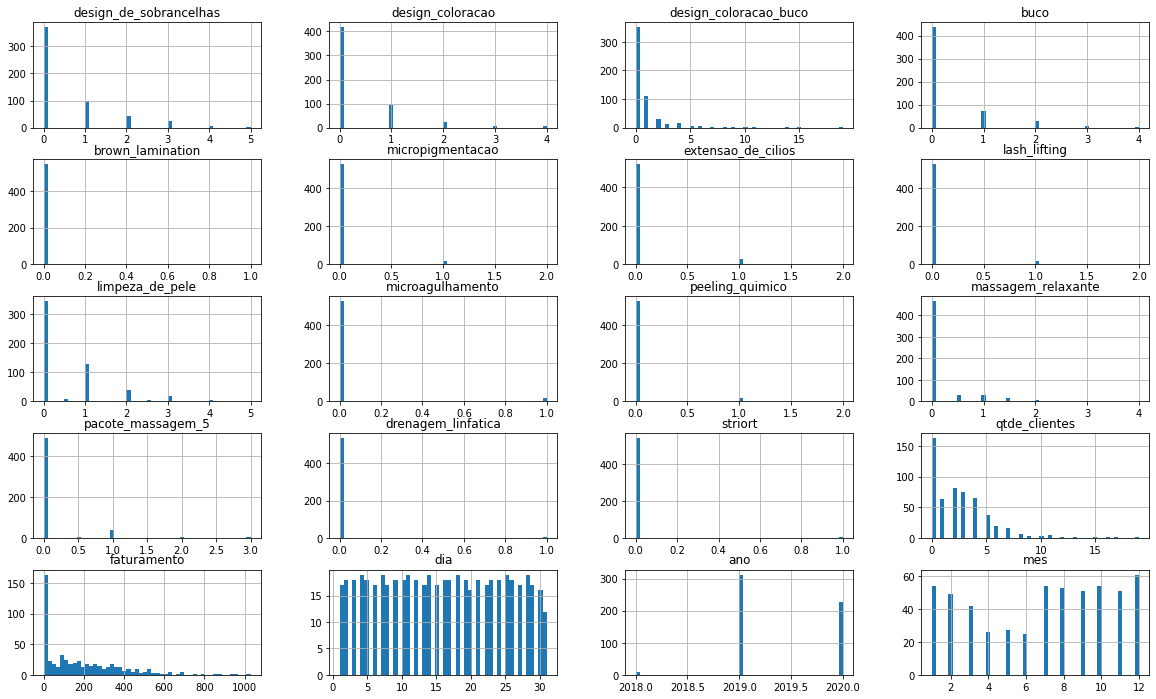

In [15]:
dados.hist(bins=50, figsize=(20,12))

 ## 3. Machine learning

 - Selecionando apenas as colunas que  importam para a modelagem.

In [16]:
dados_ml = dados[['qtde_clientes','dia','mes','dia_da_semana','faturamento']]

In [17]:
dados_ml = dados_ml[['dia','mes','dia_da_semana','qtde_clientes','faturamento']]

 - Transformando variáveis categóricas em variáveis numéricas.

In [18]:
dados_ml.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 547 entries, 0 to 546
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   dia            547 non-null    int64  
 1   mes            547 non-null    int64  
 2   dia_da_semana  547 non-null    object 
 3   qtde_clientes  547 non-null    float64
 4   faturamento    547 non-null    float64
dtypes: float64(2), int64(2), object(1)
memory usage: 21.5+ KB


In [19]:
dados_ml = pd.get_dummies(dados_ml)

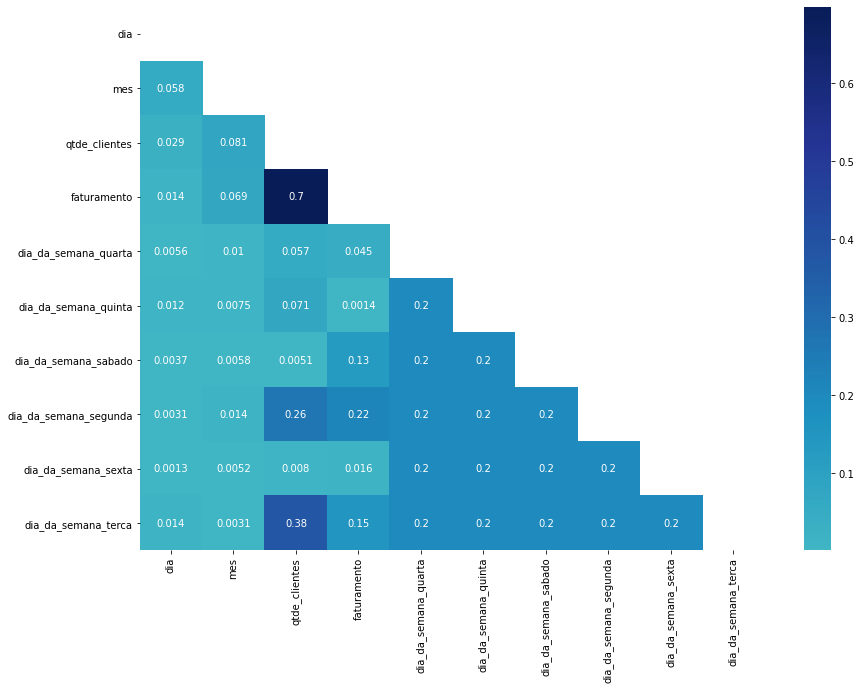

In [20]:
plt.figure(figsize=(14,10))

corr = dados_ml.corr().abs()
mask = np.triu(np.ones_like(corr, dtype=np.bool))

sns.heatmap(corr, mask=mask, annot=True, center=0, cmap="YlGnBu")

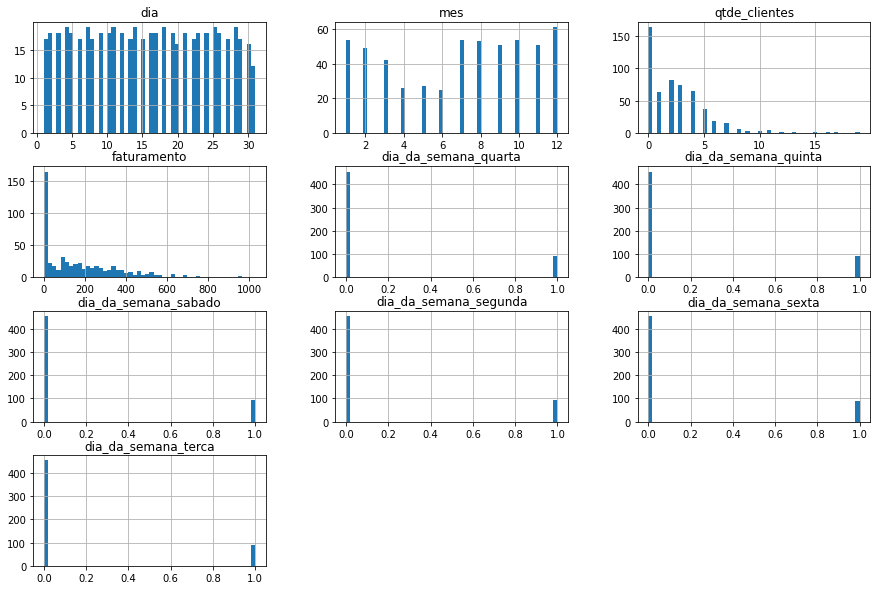

In [21]:
dados_ml.hist(bins=50, figsize=(15,10))
plt.show()

 - Normalizando os dados.

In [22]:
dados_ml['faturamento']=dados_ml['faturamento'].apply(np.log1p)
# dados['qtde_clientes']=dados['qtde_clientes'].apply(np.log1p)

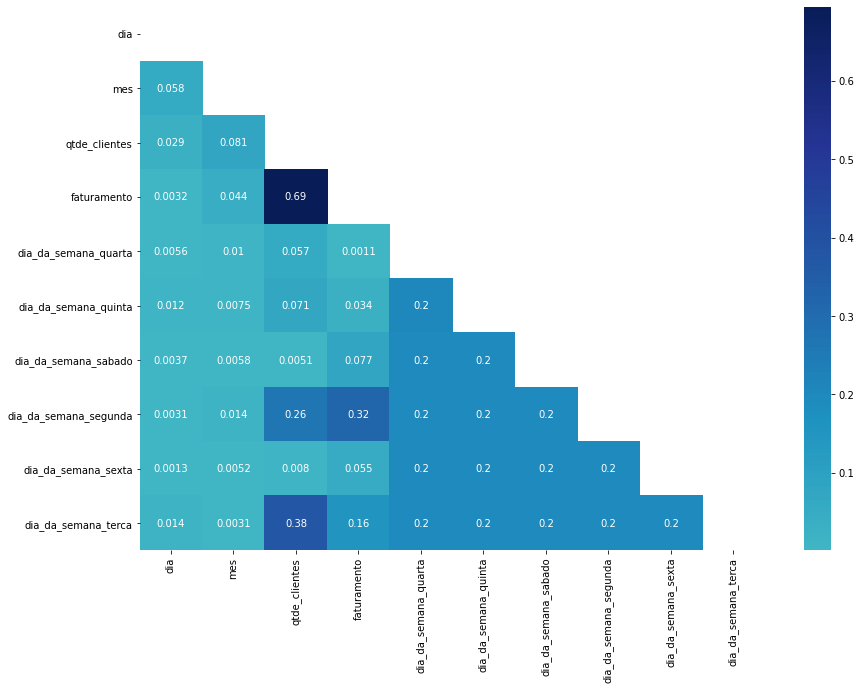

In [23]:
plt.figure(figsize=(14,10))

corr = dados_ml.corr().abs()
mask = np.triu(np.ones_like(corr, dtype=np.bool))

sns.heatmap(corr, mask=mask, annot=True, center=0, cmap="YlGnBu")

 - Separando as amostras de treino e teste.

In [24]:
X = dados_ml.drop('faturamento', axis=1)
Y = dados_ml['faturamento']

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X_treino,X_teste,Y_treino,Y_teste = train_test_split(X,Y,test_size=0.25,random_state=0, shuffle=False)

 - Visualizando X_teste e X_treino.

In [27]:
X_treino.tail()

,dia,mes,qtde_clientes,dia_da_semana_quarta,dia_da_semana_quinta,dia_da_semana_sabado,dia_da_semana_segunda,dia_da_semana_sexta,dia_da_semana_terca
405,20,7,0.0,0,0,0,1,0,0
406,21,7,0.0,0,0,0,0,0,1
407,22,7,0.0,1,0,0,0,0,0
408,23,7,1.0,0,1,0,0,0,0
409,24,7,0.0,0,0,0,0,1,0


In [28]:
X_teste.head()

,dia,mes,qtde_clientes,dia_da_semana_quarta,dia_da_semana_quinta,dia_da_semana_sabado,dia_da_semana_segunda,dia_da_semana_sexta,dia_da_semana_terca
410,25,7,0.0,0,0,1,0,0,0
411,27,7,0.0,0,0,0,1,0,0
412,28,7,2.0,0,0,0,0,0,1
413,29,7,3.0,1,0,0,0,0,0
414,30,7,0.0,0,1,0,0,0,0


 - Com essa divisão, sem aleatoriedade, garantimos que não haja vazamento de dados do conjunto de teste.
    
 - Esse vazamento iria interferir no resultado do modelo.

 - Modelo "Baseline" (Ponto de partida)

In [29]:
from sklearn.linear_model import LinearRegression

In [30]:
lr = LinearRegression()
lr.fit(X_treino, Y_treino)
lr.score(X_teste, Y_teste)

0.3984098057837479

In [31]:
y_pred = lr.predict(X_teste)

In [32]:
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score

In [33]:
MAE  = mean_absolute_error(Y_teste,y_pred)
MSE  = mean_squared_error(Y_teste,y_pred)
RMSE = np.sqrt(mean_squared_error(Y_teste,y_pred))
R2 = r2_score(Y_teste, y_pred)

print('MAE = {:0.4f}'.format(MAE))
print('MSE = {:0.4f}'.format(MSE))
print('RMSE = {:0.4f}'.format(RMSE))
print('R2 = {:0.4f}'.format(R2))

MAE = 1.7604
MSE = 3.8782
RMSE = 1.9693
R2 = 0.3984


 - Machine learning

In [34]:
from sklearn.neighbors import KNeighborsRegressor
neigh = KNeighborsRegressor(n_neighbors=5)
neigh.fit(X_treino,Y_treino)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [35]:
y_pred = neigh.predict(X_teste)

In [36]:
# Root Mean Squared Error
np.sqrt(np.mean((y_pred-Y_teste.values)**2))

1.343341387970408

In [37]:
# Mean Squared Error
np.mean((y_pred-Y_teste.values)**2)

1.804566084634262

In [38]:
# Mean Absolute Error
np.mean(np.abs(y_pred-Y_teste.values))

0.9615861659541157

In [39]:
# R2 Score
from sklearn.metrics import r2_score
r2_score(Y_teste, y_pred)

0.7200758833796201

 - Triagem com outros modelos

In [40]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor


regressor_list = [
                  DecisionTreeRegressor(),
                  RandomForestRegressor(),
                  MLPRegressor(),
                  XGBRegressor(),
           
                  ]

for reg in regressor_list:
  print('Treinando', reg.__class__.__name__)
  reg.fit(X_treino, Y_treino)
  train_score = reg.score(X_treino, Y_treino)
  test_score = reg.score(X_teste, Y_teste)
  print('Train score', train_score)
  print('Test score', test_score)
  print('='*80)

Treinando DecisionTreeRegressor
Train score 1.0
Test score 0.9046721084088317
Treinando RandomForestRegressor
Train score 0.9899525185132356
Test score 0.9517548923475212
Treinando MLPRegressor
Train score 0.9103006640277795
Test score 0.9213913946715773
Treinando XGBRegressor
[15:42:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Train score 0.9646897390046746
Test score 0.9552335830903237


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


- Repetindo com validação cruzada.

In [41]:
# repetindo processo com validação cruzada
import warnings
warnings.filterwarnings("ignore")

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score


regressor_list = [
                  DecisionTreeRegressor(),
                  RandomForestRegressor(),
                  MLPRegressor(),
                  XGBRegressor(),
                  ]

for reg in regressor_list:
  print('Treinando', reg.__class__.__name__)
  reg.fit(X_treino, Y_treino)
  train_score = reg.score(X_treino, Y_treino)
  val_score = cross_val_score(reg, X_treino, Y_treino, cv=5)
  test_score = reg.score(X_teste, Y_teste)
  print('Train score', train_score)
  print('Validation score', val_score.mean())
  print('Test score', test_score)
  print('='*80)

Treinando DecisionTreeRegressor
Train score 1.0
Validation score 0.8404840176610111
Test score 0.9169599923231078
Treinando RandomForestRegressor
Train score 0.9894022967611694
Validation score 0.9122717710873062
Test score 0.9522836079414281
Treinando MLPRegressor
Train score 0.9018433681091839
Validation score 0.7998384791775682
Test score 0.9218715988109158
Treinando XGBRegressor
[15:42:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:42:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:42:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:42:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:42:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor 

 - De acordo com os scores acima, o modelo que obteve o melhor resultado foi RandomForest.
 
 - Agora vamos calcular o erro.

In [42]:
reg = RandomForestRegressor()

In [43]:
reg.fit(X_treino, Y_treino)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [44]:
y_pred = reg.predict(X_teste)

In [45]:
MAE  = mean_absolute_error(Y_teste,y_pred)
MSE  = mean_squared_error(Y_teste,y_pred)
RMSE = np.sqrt(mean_squared_error(Y_teste,y_pred))
R2 = r2_score(Y_teste, y_pred)

print('MAE = {:0.8f}'.format(MAE))
print('MSE = {:0.8f}'.format(MSE))
print('RMSE = {:0.8f}'.format(RMSE))
print('R2 = {:0.8}'.format(R2))

MAE = 0.37873818
MSE = 0.29785222
RMSE = 0.54575839
R2 = 0.95379719


 - Visualizando o comportamento do y_pred e Y_teste.

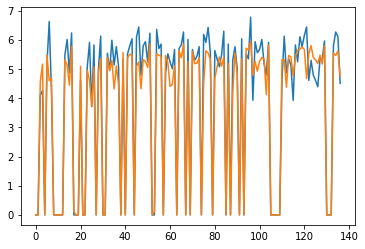

In [46]:
plt.plot(Y_teste.values)
plt.plot(y_pred)

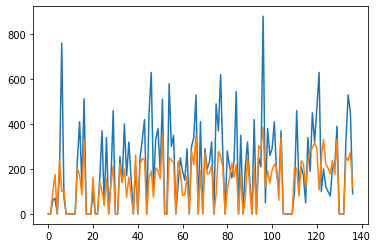

In [47]:
plt.plot(np.expm1(Y_teste.values))
plt.plot(np.expm1(y_pred))